## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

## **Read Dataset**

In [2]:
train_df = pd.read_csv('AAPL.xls')

## **Exploratory data analysis**

In [3]:
train_df.head()

,Date,Open
0,1/2/2013,79.117142
1,1/3/2013,78.268570
2,1/4/2013,76.709999
3,1/7/2013,74.571426
4,1/8/2013,75.601425


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   object 
 1   Open    1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


## **Data Preprocessing**

In [5]:
train_df_processed = train_df.iloc[:, 1:2].values

In [6]:
train_df_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [7]:
scaler = MinMaxScaler(feature_range= (0,1))
train_df_scaled = scaler.fit_transform(train_df_processed)

In [8]:
train_df_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [9]:
train_df_scaled.shape

(1259, 1)

In [10]:
x = []
y = []

for i in range(40, 1259):
    x.append(train_df_scaled[i-40:i, 0])
    y.append(train_df_scaled[i,0])

In [11]:
x = np.array(x)

In [12]:
y = np.array(y)

In [13]:
x.shape

(1219, 40)

In [14]:
y.shape

(1219,)

In [15]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [16]:
x.shape

(1219, 40, 1)

## **Model Building**

In [17]:
model = Sequential()
model.add(LSTM(300, return_sequences = True, input_shape = (x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 300)           362400    
                                                                 
 dropout (Dropout)           (None, 40, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           160400    
                                                                 
 dropout_1 (Dropout)         (None, 40, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 40, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 40, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

## **Compile and model fitting**

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50)

Epoch 1/50
39/39 [==============================] - 26s 311ms/step - loss: 0.0448
Epoch 2/50
39/39 [==============================] - 13s 334ms/step - loss: 0.0039
Epoch 3/50
39/39 [==============================] - 15s 374ms/step - loss: 0.0039
Epoch 4/50
39/39 [==============================] - 14s 354ms/step - loss: 0.0031
Epoch 5/50
39/39 [==============================] - 14s 347ms/step - loss: 0.0038
Epoch 6/50
39/39 [==============================] - 14s 359ms/step - loss: 0.0031
Epoch 7/50
39/39 [==============================] - 14s 353ms/step - loss: 0.0027
Epoch 8/50
39/39 [==============================] - 14s 360ms/step - loss: 0.0027
Epoch 9/50
39/39 [==============================] - 14s 351ms/step - loss: 0.0035
Epoch 10/50
39/39 [==============================] - 14s 366ms/step - loss: 0.0025
Epoch 11/50
39/39 [==============================] - 13s 344ms/step - loss: 0.0029
Epoch 12/50
39/39 [==============================] - 13s 340ms/step - loss: 0.0023
Epoch 13/50
3

##  **Read the testing data**

In [22]:
testing_df = pd.read_csv('AAPL - Jan2018.xls')
testing_df.head()

,Date,Open
0,1/2/2018,170.160004
1,1/3/2018,172.529999
2,1/4/2018,172.539993
3,1/5/2018,173.440002
4,1/8/2018,174.350006


In [23]:
testing_df.shape

(20, 2)

In [24]:
testing_df_processed = testing_df.iloc[:, 1:2].values

In [25]:
testing_df_processed

array([[170.160004],
       [172.529999],
       [172.539993],
       [173.440002],
       [174.350006],
       [174.550003],
       [173.160004],
       [174.589996],
       [176.179993],
       [177.899994],
       [176.149994],
       [179.369995],
       [178.610001],
       [177.300003],
       [177.300003],
       [177.25    ],
       [174.509995],
       [172.      ],
       [170.160004],
       [165.529999]])

In [26]:
total_df = pd.concat((train_df['Open'], testing_df['Open']), axis =0)

In [27]:
test_inputs = total_df[len(total_df)- len(testing_df)- 40:].values

In [28]:
test_inputs = test_inputs.reshape(-1,1)

In [29]:
test_inputs.shape

(60, 1)

In [30]:
test_inputs = scaler.transform(test_inputs)

In [31]:
test_features = []
for i in range(40,60):
    test_features.append(test_inputs[i - 40 :i, 0])

In [32]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [33]:
test_features.shape

(20, 40, 1)

## **Model Evaluation**

In [34]:
prediction = model.predict(test_features)

1/1 [==============================] - 2s 2s/step


In [35]:
prediction

array([[0.943303  ],
       [0.93618226],
       [0.9325379 ],
       [0.9331818 ],
       [0.9377484 ],
       [0.9450418 ],
       [0.9532481 ],
       [0.95986146],
       [0.96392626],
       [0.9662949 ],
       [0.96891624],
       [0.97214144],
       [0.9769771 ],
       [0.9830826 ],
       [0.98868954],
       [0.9922007 ],
       [0.99294174],
       [0.9900313 ],
       [0.98276335],
       [0.9713098 ]], dtype=float32)

In [36]:
prediction = scaler.inverse_transform(prediction)

In [37]:
prediction

array([[168.32417],
       [167.47192],
       [167.03575],
       [167.11282],
       [167.65938],
       [168.53229],
       [169.51447],
       [170.306  ],
       [170.7925 ],
       [171.07597],
       [171.38972],
       [171.77573],
       [172.35449],
       [173.08524],
       [173.7563 ],
       [174.17653],
       [174.26523],
       [173.91689],
       [173.04703],
       [171.6762 ]], dtype=float32)

## **Visualization**

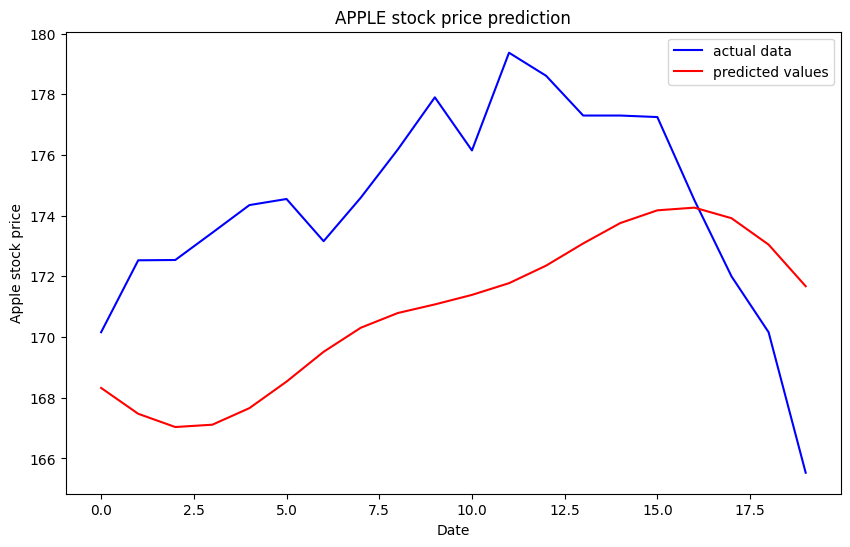

In [38]:
plt.figure(figsize = (10,6))
plt.plot(testing_df_processed, color = 'blue', label = 'actual data')
plt.plot(prediction, color = 'red', label = 'predicted values')
plt.title('APPLE stock price prediction')
plt.xlabel('Date')
plt.ylabel('Apple stock price')
plt.legend()
plt.show()

In [40]:
model.save('apple_prediction.keras')